In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [ ]:
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Ensure that StyleGAN is loaded

In [ ]:
!ls /content/stylegan3

Generating images from random seed values

In [ ]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=6600-6605

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 6600 (0/6) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Generating image for seed 6601 (1/6) ...
Generating image for seed 6602 (2/6) ...
Generating image for seed 6603 (3/6) ...
Generating image for seed 6604 (4/6) ...
Generating image for seed 6605 (5/6) ...


In [ ]:
!ls /content/results

seed6600.png  seed6601.png  seed6602.png  seed6603.png	seed6604.png  seed6605.png


In [ ]:
# !cp /content/results/* \
#    /content/drive/MyDrive/Machine\ Learning/FaceGen_StyleGAN

In [ ]:
import sys
sys.path.insert(0,"/content/stylegan3")
import os
import pickle
import numpy as np
import PIL
# from PIL import image
import pandas as pd
import matplotlib.pyplot as plt
import torch
import dnnlib
import legacy
import IPython.display
from IPython.display import Image

In [ ]:
def seed2vec(G, seed):
    return np.random.RandomState(seed).randn(1,G.z_dim)

def displayImage(image):
    plt.axis("off")
    plt.imshow(image)
    plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8,
         nchw_to_nhwc=True),
        'randomize_noise': False
    }

    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    # [minibatch, height, width, channel]
    images = G.run(z, label, **G_kwargs)
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail("Must specify class label with --class when using "\
            "a conditional network")
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ("warn: --class=lbl ignored when running on "\
            "an unconditional network")
  return label

# def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const',
#                    class_idx=None):
#   z = torch.from_numpy(z).to(device)
#   label = get_label(G, device, class_idx)
#   img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
#   img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(\
#       torch.uint8)
#   return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

In [ ]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...


In [ ]:
print(len(seed2vec(G, 6600)[0]))

512


In [ ]:
!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=6620-6625

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 6620 (0/6) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Generating image for seed 6621 (1/6) ...
Generating image for seed 6622 (2/6) ...
Generating image for seed 6623 (3/6) ...
Generating image for seed 6624 (4/6) ...
Generating image for seed 6625 (5/6) ...


In [ ]:
def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) )
  return result

In [ ]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

vector_size = G.z_dim
# range(8192,8300)
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)
print(seeds[0].shape)

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
(1, 512)
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
(1, 512)


In [ ]:
print(len(seeds))

saving seeds corresponding to images in csv file

In [ ]:
print(seeds)
print(len(seeds))

[6624, 6618, 6616, 5501, 5502, 5552, 4381, 4386, 1002, 1003, 1004, 1005, 1008, 3304, 3355, 3365, 3465, 4475, 4236, 4232, 4158, 4145, 5123, 5124, 5126]
25


Generating 2500 images and storing them along with their input vectors

In [ ]:
# seeds = [6634, 6635, 6640]
columns = ["image_number", "image", "seed"]
df = pd.DataFrame(columns = columns)
STEPS = 100
print(seeds)
# Remove any prior results
# !rm /content/results/*

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(seeds)-1):
  v1 = seed2vec(G, seeds[i])
  v2 = seed2vec(G, seeds[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {seeds[i]}"):
    current = current + step
    image = generate_image(device, G, current)
    img = np.array(image)
    df = pd.concat([df, pd.DataFrame({"image_number":idx, "image": [img], "seed":[current]})])
    image.save(f'./results/frame-{idx}.png')
    idx+=1
df.to_csv("/content/image_keys.csv", index = False)
#link images into video
!ffmpeg -r 30 -i /content/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

[6624, 6618, 6616, 5501, 5502, 5552, 4381, 4386, 1002, 1003, 1004, 1005, 1008, 3304, 3355, 3365, 3465, 4475, 4236, 4232, 4158, 4145, 5123, 5124, 5126]


Seed 6624:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 6618:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 6616:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 5501:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 5502:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 5552:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4381:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4386:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1002:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1003:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1004:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1005:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1008:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 3304:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 3355:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 3365:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 3465:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4475:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4236:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4232:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4158:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 4145:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 5123:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 5124:   0%|          | 0/100 [00:00<?, ?it/s]

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!rm /content/results/*

## Generating random input vectors and corresponding faces

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/")
os.getcwd()

'/content'

In [ ]:
len(os.listdir())

900

In [ ]:
seeds = [6624, 6618, 6616, 5501, 5502, 5552, 4381, 4386, 1002, 1003, 1004, 1005, 1008, 3304, 3355, 3365, 3465, 4475, 4236, 4232, 4158, 4145, 5123, 5124, 5126]

In [ ]:
len(seeds)

25

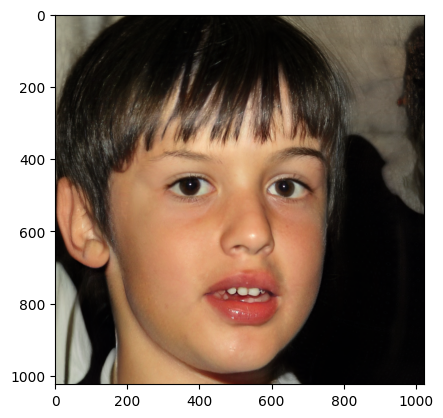

In [ ]:
%matplotlib inline
seed = 5126
curr = seed2vec(G, seed)
image = generate_image(device, G, curr)
plt.imshow(img)
plt.show()

In [ ]:
img = np.array(image)

In [ ]:
img.shape

(1024, 1024, 3)

In [ ]:
curr.shape

(1, 512)

In [ ]:
curr

Copying images to google drive

In [ ]:
# !cp /content/results/* \
#     /content/drive/MyDrive/Machine\ Learning/FaceGen_StyleGAN/train_images